In [2]:
# import common APIs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import cross_validation, naive_bayes, tree, svm, ensemble
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve
from xgboost import XGBClassifier

In [5]:
# Data observation
filepath = '/Users/mac/Desktop/Kaggle_datasets/Glass_classification/'
filename01 = 'glass.csv'

df = pd.read_csv(os.path.join(filepath, filename01))
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.Type.value_counts() # 注意根本沒有type 4

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

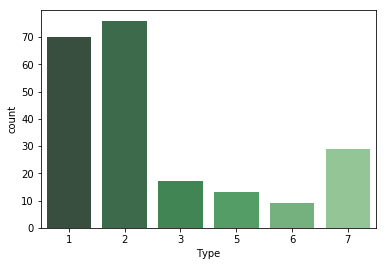

In [13]:
sns.countplot(x="Type", data=df, palette="Greens_d");

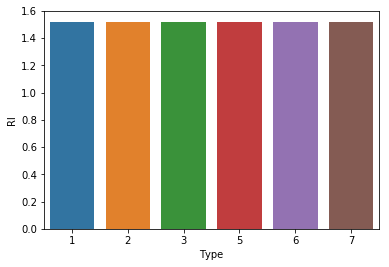

In [15]:
sns.barplot(x="Type", y="RI", data=df); #預設取y的平均值

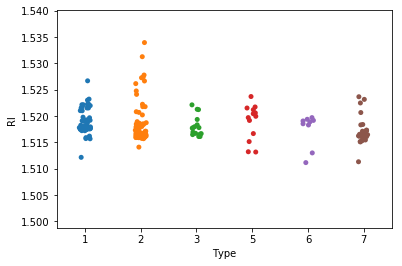

In [16]:
sns.stripplot(x="Type", y="RI", data=df, jitter=True); #讓overlap的部分可以擺在橫向上

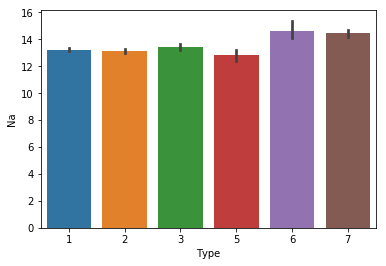

In [20]:
sns.barplot(x="Type", y="Na", data=df); #預設取y的平均值

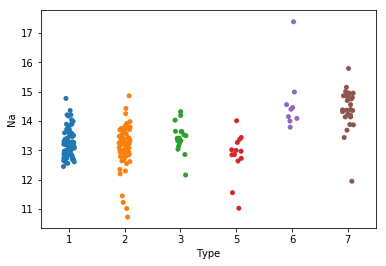

In [19]:
sns.stripplot(x="Type", y="Na", data=df, jitter=True)

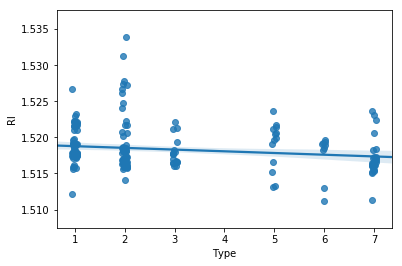

In [11]:
sns.regplot(x="Type", y="RI", data=df, x_jitter=.05);

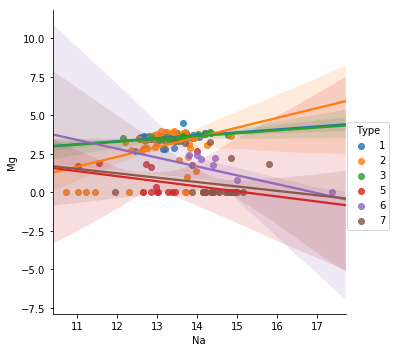

In [12]:
sns.lmplot(x="Na", y="Mg", hue="Type", data=df)

In [41]:
T1 = df.loc[df.Type == 1]
T2 = df.loc[df.Type == 2]
T3 = df.loc[df.Type == 3]
T5 = df.loc[df.Type == 5]
T6 = df.loc[df.Type == 6]
T7 = df.loc[df.Type == 7]

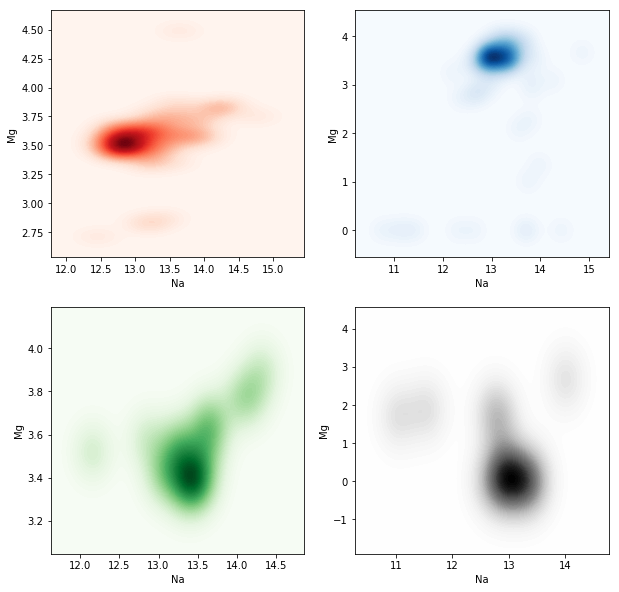

In [63]:
### 分開的彩色等高線熱點圖
f, ([ax1,ax2],[ax3,ax5]) = plt.subplots(2,2,figsize=(10, 10))
#cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
ax1 = sns.kdeplot(T1.Na, T1.Mg, cmap='Reds', n_levels=60, shade=True, ax=ax1);
ax2 = sns.kdeplot(T2.Na, T2.Mg, cmap='Blues', n_levels=60, shade=True, ax=ax2);
ax3 = sns.kdeplot(T3.Na, T3.Mg, cmap='Greens', n_levels=60, shade=True, ax=ax3);
ax5 = sns.kdeplot(T5.Na, T5.Mg, cmap='Greys', n_levels=60, shade=True, ax=ax5);

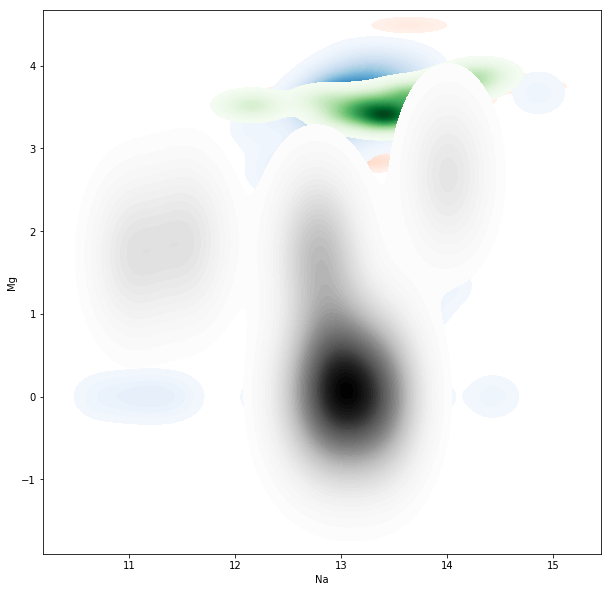

In [64]:
### 疊再一起的等高線彩圖，顏色不會融合，醜XD
f, ax = plt.subplots(figsize=(10, 10))
#cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
ax = sns.kdeplot(T1.Na, T1.Mg, cmap='Reds', n_levels=60, shade_lowest=False, shade=True,);
ax = sns.kdeplot(T2.Na, T2.Mg, cmap='Blues', n_levels=60, shade_lowest=False, shade=True, );
ax = sns.kdeplot(T3.Na, T3.Mg, cmap='Greens', n_levels=60, shade_lowest=False, shade=True, );
ax = sns.kdeplot(T5.Na, T5.Mg, cmap='Greys', n_levels=60, shade_lowest=False, shade=True, );

In [21]:
# Data preprocessing
from sklearn.utils import shuffle

shuffle_df = shuffle(df, random_state=42)

df_label = shuffle_df['Type']
df_feature = shuffle_df.drop('Type', axis=1)

cut_point = round(len(df)*0.6)
train_feature = np.array(df_feature.values[:cut_point,:])
train_label = np.array(df_label.values[:cut_point])
test_feature = np.array(df_feature.values[cut_point:,:])
test_label = np.array(df_label.values[cut_point:])

# Scikit-Learn: DecisionTreeClassifier 和 ensemblerandomforest 還是最強

In [74]:
### naive_bayes.GaussianNB()
from sklearn import cross_validation, naive_bayes
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=naive_bayes.GaussianNB()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.375000
Testing Score:0.313953

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        11
          2       0.00      0.00      0.00        12
          3       0.10      0.67      0.17         3
          5       1.00      1.00      1.00         2
          6       0.00      0.00      0.00         1
          7       1.00      1.00      1.00         3

avg / total       0.17      0.22      0.17        32


             precision    recall  f1-score   support

          1       0.00      0.00      0.00        28
          2       0.31      0.18      0.23        28
          3       0.11      0.83      0.20         6
          5       0.33      0.33      0.33         6
          6       0.60      1.00      0.75         3
          7       0.86      0.80      0.83        15

avg / total       0.30      0.31      0.28        86



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
### naive_bayes.MultinomialNB()
from sklearn import cross_validation, naive_bayes
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.507812
Testing Score:0.430233

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        11
          2       0.48      1.00      0.65        12
          3       0.00      0.00      0.00         3
          5       1.00      0.50      0.67         2
          6       0.00      0.00      0.00         1
          7       0.60      1.00      0.75         3

avg / total       0.30      0.50      0.36        32


             precision    recall  f1-score   support

          1       0.00      0.00      0.00        28
          2       0.37      0.89      0.53        28
          3       0.00      0.00      0.00         6
          5       0.25      0.17      0.20         6
          6       0.00      0.00      0.00         3
          7       0.79      0.73      0.76        15

avg / total       0.28      0.43      0.32        86



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.00      0.00      0.00        28
          2       0.31      0.18      0.23        28
          3       0.11      0.83      0.20         6
          5       0.33      0.33      0.33         6
          6       0.60      1.00      0.75         3
          7       0.86      0.80      0.83        15

avg / total       0.30      0.31      0.28        86

[[ 0  7 20  0  1  0]
 [ 1  5 18  3  0  1]
 [ 0  0  5  0  1  0]
 [ 0  3  0  2  0  1]
 [ 0  0  0  0  3  0]
 [ 0  1  1  1  0 12]]


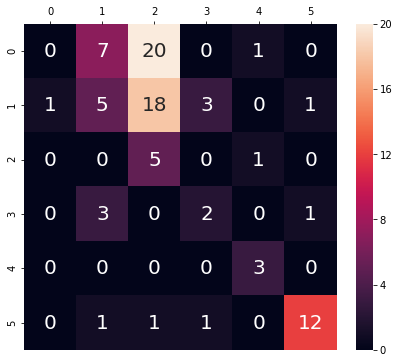

In [75]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (7, 6))
sns.heatmap(conf, annot=True, ax=ax, fmt='d', annot_kws={'size':20}) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

In [65]:
### tree.DecisionTreeClassifier()
from sklearn import cross_validation,tree
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.890625
Testing Score:0.779070

             precision    recall  f1-score   support

          1       0.55      0.55      0.55        11
          2       0.55      0.50      0.52        12
          3       0.00      0.00      0.00         3
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3

avg / total       0.58      0.56      0.57        32


             precision    recall  f1-score   support

          1       0.71      0.79      0.75        28
          2       0.80      0.86      0.83        28
          3       0.67      0.67      0.67         6
          5       0.83      0.83      0.83         6
          6       0.67      0.67      0.67         3
          7       1.00      0.67      0.80        15

avg / total       0.79      0.78      0.78        86



             precision    recall  f1-score   support

          1       0.71      0.79      0.75        28
          2       0.80      0.86      0.83        28
          3       0.67      0.67      0.67         6
          5       0.83      0.83      0.83         6
          6       0.67      0.67      0.67         3
          7       1.00      0.67      0.80        15

avg / total       0.79      0.78      0.78        86

[[22  5  1  0  0  0]
 [ 3 24  1  0  0  0]
 [ 2  0  4  0  0  0]
 [ 1  0  0  5  0  0]
 [ 0  1  0  0  2  0]
 [ 3  0  0  1  1 10]]


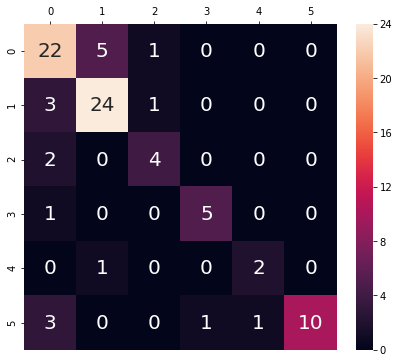

In [73]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (7, 6))
sns.heatmap(conf, annot=True, ax=ax, fmt='d', annot_kws={'size':20}) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

In [29]:
### svm.LinearSVC()
from sklearn import cross_validation,svm
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=svm.LinearSVC()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.476562
Testing Score:0.441860

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        11
          2       0.50      1.00      0.67        12
          3       0.33      0.33      0.33         3
          5       0.67      1.00      0.80         2
          6       0.00      0.00      0.00         1
          7       1.00      0.67      0.80         3

avg / total       0.35      0.53      0.41        32


             precision    recall  f1-score   support

          1       0.00      0.00      0.00        28
          2       0.44      0.79      0.56        28
          3       0.14      0.33      0.20         6
          5       0.36      0.67      0.47         6
          6       0.00      0.00      0.00         3
          7       0.91      0.67      0.77        15

avg / total       0.34      0.44      0.36        86



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
### svm.SVC()
from sklearn import cross_validation,svm
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=svm.SVC()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.671875
Testing Score:0.697674

             precision    recall  f1-score   support

          1       0.60      0.82      0.69        11
          2       0.67      0.67      0.67        12
          3       0.00      0.00      0.00         3
          5       1.00      1.00      1.00         2
          6       0.00      0.00      0.00         1
          7       1.00      1.00      1.00         3

avg / total       0.61      0.69      0.64        32


             precision    recall  f1-score   support

          1       0.78      0.75      0.76        28
          2       0.56      0.89      0.68        28
          3       0.00      0.00      0.00         6
          5       1.00      0.67      0.80         6
          6       0.00      0.00      0.00         3
          7       1.00      0.67      0.80        15

avg / total       0.68      0.70      0.67        86



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
### ensemble.AdaBoostClassifier()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=ensemble.AdaBoostClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.484375
Testing Score:0.418605

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        11
          2       0.43      1.00      0.60        12
          3       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         2
          6       1.00      1.00      1.00         1
          7       1.00      0.67      0.80         3

avg / total       0.29      0.47      0.33        32


             precision    recall  f1-score   support

          1       0.00      0.00      0.00        28
          2       0.40      0.93      0.56        28
          3       0.00      0.00      0.00         6
          5       0.00      0.00      0.00         6
          6       0.43      1.00      0.60         3
          7       1.00      0.47      0.64        15

avg / total       0.32      0.42      0.31        86



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
### ensemble.GradientBoostingClassifier()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=ensemble.GradientBoostingClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.929688
Testing Score:0.697674

             precision    recall  f1-score   support

          1       0.59      0.91      0.71        11
          2       0.78      0.58      0.67        12
          3       0.00      0.00      0.00         3
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3

avg / total       0.68      0.72      0.68        32


             precision    recall  f1-score   support

          1       0.81      0.79      0.80        28
          2       0.67      0.71      0.69        28
          3       0.50      0.17      0.25         6
          5       0.40      0.67      0.50         6
          6       0.40      0.67      0.50         3
          7       0.92      0.73      0.81        15

avg / total       0.72      0.70      0.70        86



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
### ensemble.RandomForestClassifier()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.929688
Testing Score:0.627907

             precision    recall  f1-score   support

          1       0.59      0.91      0.71        11
          2       1.00      0.67      0.80        12
          3       0.00      0.00      0.00         3
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3

avg / total       0.76      0.75      0.73        32


             precision    recall  f1-score   support

          1       0.63      0.61      0.62        28
          2       0.55      0.64      0.59        28
          3       0.40      0.33      0.36         6
          5       0.67      0.67      0.67         6
          6       0.50      0.33      0.40         3
          7       0.92      0.80      0.86        15

avg / total       0.64      0.63      0.63        86



In [76]:
# XGBClassifier()
from xgboost import XGBClassifier
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=XGBClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.937500
Testing Score:0.697674

             precision    recall  f1-score   support

          1       0.61      1.00      0.76        11
          2       0.88      0.58      0.70        12
          3       0.00      0.00      0.00         3
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3

avg / total       0.73      0.75      0.71        32


             precision    recall  f1-score   support

          1       0.76      0.79      0.77        28
          2       0.63      0.68      0.66        28
          3       0.50      0.17      0.25         6
          5       0.40      0.67      0.50         6
          6       1.00      0.67      0.80         3
          7       0.92      0.80      0.86        15

avg / total       0.71      0.70      0.69        86



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.63      0.61      0.62        28
          2       0.55      0.64      0.59        28
          3       0.40      0.33      0.36         6
          5       0.67      0.67      0.67         6
          6       0.50      0.33      0.40         3
          7       0.92      0.80      0.86        15

avg / total       0.64      0.63      0.63        86

[[17  8  3  0  0  0]
 [ 7 18  0  2  1  0]
 [ 2  2  2  0  0  0]
 [ 0  1  0  4  0  1]
 [ 0  2  0  0  1  0]
 [ 1  2  0  0  0 12]]


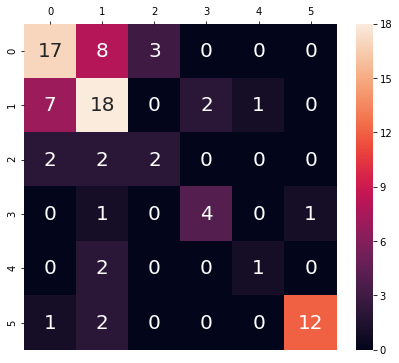

In [105]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (7, 6))
sns.heatmap(conf, annot=True, ax=ax, fmt='d', annot_kws={'size':20}) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

             precision    recall  f1-score   support

          1       0.76      0.79      0.77        28
          2       0.63      0.68      0.66        28
          3       0.50      0.17      0.25         6
          5       0.40      0.67      0.50         6
          6       1.00      0.67      0.80         3
          7       0.92      0.80      0.86        15

avg / total       0.71      0.70      0.69        86

[[22  6  0  0  0  0]
 [ 2 19  1  6  0  0]
 [ 4  1  1  0  0  0]
 [ 0  1  0  4  0  1]
 [ 0  1  0  0  2  0]
 [ 1  2  0  0  0 12]]


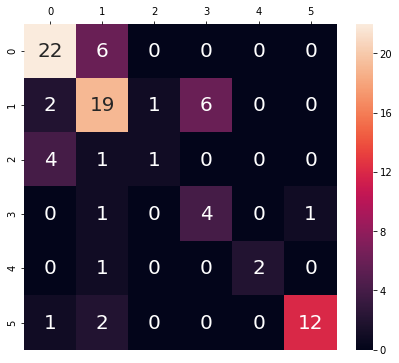

In [77]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (7, 6))
sns.heatmap(conf, annot=True, ax=ax, fmt='d', annot_kws={'size':20}) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

# Keras: MLP，效果輸ensemble

In [78]:
# Standardize
scaler = MinMaxScaler()
scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

In [89]:
# Onehot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(train_label.reshape(-1,1))
train_label_OHE = enc.transform(train_label.reshape(-1,1)).toarray()
test_label_OHE = enc.transform(test_label.reshape(-1,1)).toarray()

In [90]:
train_label_OHE[0:5]

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.]])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 200)               2000      
_________________________________________________________________
dropout_23 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_24 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 6)                 1206      
Total params: 43,406
Trainable params: 43,406
Non-trainable params: 0
_________________________________________________________________
None
Train on 25 samples, validate on 103 samples
Epoch 1/500
0s - loss: 1.7885 - acc: 0.3600 - val_loss: 1.7882 - val_acc: 0.4272
Epoch 2

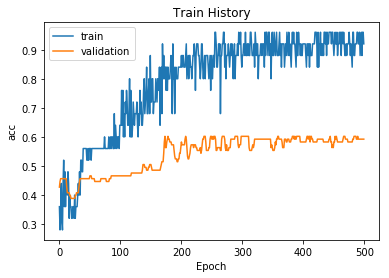

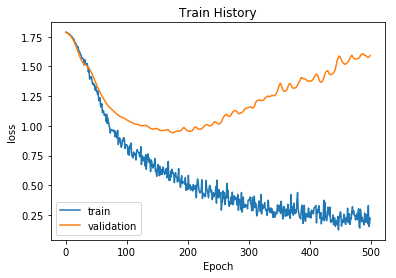

32/86 [==========>...................] - ETA: 0s

accuracy= 0.662790697674
32/86 [==========>...................] - ETA: 0s

In [100]:
# Keras MLP models: categorical_clf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential()
model.add(Dense(units=200,
                input_dim=9,
                kernel_initializer='uniform',
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=200,
                kernel_initializer='uniform',
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=6, #輸出onehot encoding的陣列
                kernel_initializer='uniform',
                activation='softmax'))

print(model.summary()) #可以清楚看到model還有參數數量

model.compile(loss='categorical_crossentropy', #多元用categorical
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label_OHE,  #上面多分割一步在keras是內建的
                          validation_split=0.8, epochs=500,
                          batch_size=2000, verbose=2) #verbose=2表示顯示訓練過程

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

scores = model.evaluate(test_feature_trans, test_label_OHE)
print('\n')
print('accuracy=',scores[1])

prediction = model.predict_classes(test_feature_trans)

In [101]:
# Train/Test Score，接續後面的confusion matrix
df_ans = pd.DataFrame({'Real Class' :test_label})
df_ans['Prediction'] = prediction

//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.17      0.18      0.18        28
          2       0.00      0.00      0.00        28
          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00         0
          5       0.13      0.33      0.19         6
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00        15

avg / total       0.07      0.08      0.07        86

[[ 0  0  0  0  0  0  0  0]
 [23  5  0  0  0  0  0  0]
 [ 4 20  0  2  1  1  0  0]
 [ 5  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  2  0  1  1  2  0  0]
 [ 0  1  0  1  1  0  0  0]
 [ 1  0  0  1  1 12  0  0]]


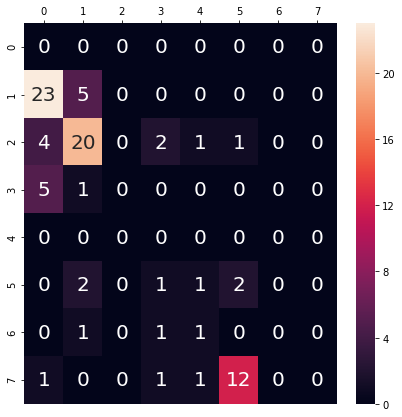

In [103]:
# confusion matrix
prediction2_list = prediction.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (7, 7))
sns.heatmap(conf, annot=True, ax=ax, fmt='d', annot_kws={'size':20}) #字體大小
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()